# Clustering using DBSCAN

### Import libraries

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

### Load Data From CSV File  

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df.shape

(850, 10)

### Pre-processing

In [4]:
df = df [['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [5]:
#Normalize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


In [6]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(df)

DBSCAN(eps=0.2)

In [28]:
labels = dbscan.labels_
labels[:100]

array([ 0,  1,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [29]:
pd.Series(labels).value_counts()

 0    748
-1     73
 1      9
 2      8
 4      7
 3      5
Name: count, dtype: int64

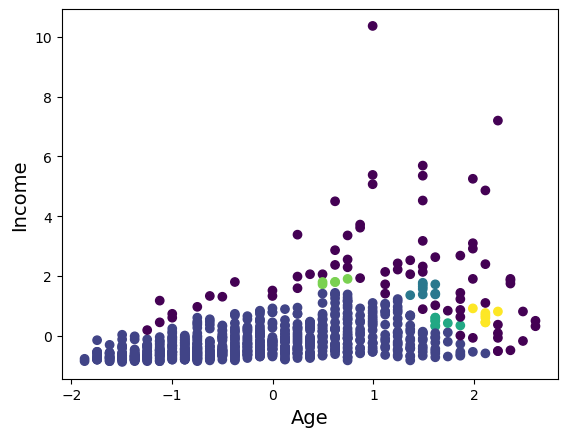

In [30]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(float))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.show()

In [11]:
len(dbscan.components_)

847

In [12]:
len(dbscan.core_sample_indices_)

847

In [13]:
core_points = df.loc[dbscan.core_sample_indices_,:]
core_labels = labels[dbscan.core_sample_indices_]

In [14]:
noise_index =[]
for idx in df.index:
    if labels[idx] == -1:
           noise_index.append(idx)

In [15]:
len(noise_index)

2

In [16]:
noise_points = df.loc[noise_index,:]

In [17]:
len(noise_points)

2

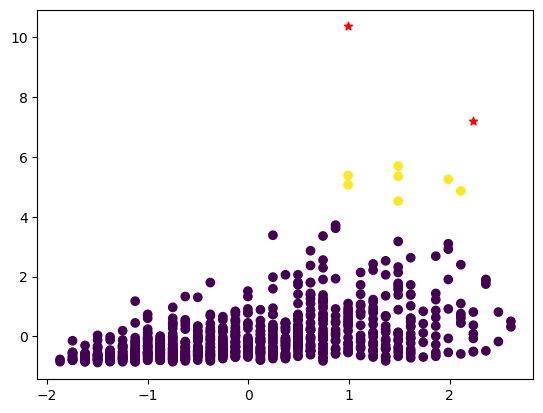

In [18]:
# Plot core points
plt.scatter(core_points['Age'], core_points['Income'], c=core_labels.astype(float))
plt.scatter(noise_points['Age'], noise_points['Income'], c='red', marker='*')
plt.show()